In [64]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, fancy_legend, mpl_loc, load_mpl_presets
import numpy as np
import vice
import sys
load_mpl_presets()
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


In [65]:
class linear_exponential:
    
    def __init__(self, norm = 100, timescale = 1):
        self.norm = norm
        self.timescale = timescale
        
    def __call__(self, time):
        return self.norm * np.exp(-time / self.timescale)

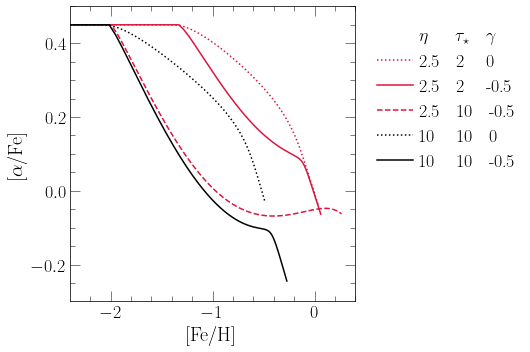

In [144]:
fig = plt.figure(figsize = (7.5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel(r"[$\alpha$/Fe]")
ax.set_xlim([-2.4, 0.4])
ax.set_ylim([-0.3, 0.5])
ax.set_yticks([-0.2, 0, 0.2, 0.4])

ax.plot([-0.1, 0], [0, 0.1], c = named_colors()["white"], alpha = 0,
    label = r"$\eta$\space\space\space\space\space$\tau_\star$\space\space\space$\gamma$")

vice.yields.ccsne.settings['o'] = 0.015
vice.yields.sneia.settings['o'] = 0
vice.yields.ccsne.settings['fe'] = 0.0012
with vice.singlezone(name = "tmp") as sz:
    vice.yields.sneia.settings['fe'] = 0.0017
    sz.func = linear_exponential(timescale = 5)
    sz.mode = "sfr"
    sz.eta = 2.5
    sz.tau_star = 2
    sz.delay = 0.1
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    line1, = ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["crimson"], linestyle = ':',
        label = "2.5\space\space\space2\space\space\space\space0")
    vice.yields.sneia.settings['fe'] = lambda z: 0.0017 * (z / 0.014)**(-0.5) if z else 0
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    line2, = ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["crimson"],
        label = "2.5\space\space\space2\space\space\space\space-0.5")
    sz.tau_star = 10
#     vice.yields.sneia.settings['fe'] = 0.0017
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    line3, = ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["crimson"], linestyle = '--',
        label = "2.5\space\space\space10\space\space\space-0.5")
#     ax.plot(out.history["time"], out.history["[o/h]"], color = named_colors()["crimson"])
#     ax.plot(out.history["time"], out.history["[fe/h]"], color = named_colors()["black"])
    
with vice.singlezone(name = "tmp") as sz:
    vice.yields.sneia.settings['fe'] = 0.0017
    sz.func = linear_exponential(timescale = 5)
    sz.mode = "sfr"
    sz.eta = 10
    sz.tau_star = 10
    sz.delay = 0.1
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    line4, = ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["black"], linestyle = ':',
        label = "10\space\space\space\space10\space\space\space0")
    vice.yields.sneia.settings['fe'] = lambda z: 0.0017 * (z / 0.014)**(-0.5) if z else 0
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    line5, = ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["black"],
        label = "10\space\space\space\space10\space\space\space-0.5")

kwargs = {
    "loc": mpl_loc("upper left"),
    "bbox_to_anchor": (1.02, 0.98)
}
leg = ax.legend(**kwargs)

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./afe_feh_tracks.%s" % (ext), **kwargs)
plt.show()